In [3]:
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

#### Introdução a Redes Neurais

* Algoritmo de aprendizagem de máquina inspirado no neurônio biológico, possuindo uma estrutura básica chamada neurônio

1. Neurônio biológico

![Title](imgs/neuronio.jpg)

2. Neurônio de uma rede neural (perceptron)

* Estrutura com pesos para cada entrada
* Objetivo de encontrar os melhores pesos para classificar um problema
* Funciona apenas para problemas linearmente separáveis

![Title](imgs/perceptron.png)

3. Para formar uma rede neural propriamente dita, tem-se um conjunto de neurônios
* Múltiplos neurônios formam uma camada
* Possibilidade de resolver problemas que não são linearmente separáveis
![Title](imgs/rn.png)

### Prática
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)

#### 1. Aquisição dos dados

Na aula de hoje trabalharemos com datasets já existentes no Tensorflow/keras. Temos uma série de datasets disponíveis que podem ser visualizados [aqui](https://keras.io/api/datasets/).

Para iniciar, trabalharemos com nosso hello world de redes neurais, o MNIST. Essa base é constituída de classes de dígitos, cujo objetivo é identificar qual o dígito presente na imagem

De forma geral, podemos pensar neste dataset como:
* Simples: não possui objetos complexos de se identificar, imagens são em tons de cinza e não possuem background
* Processamento rápido: a presença de um único canal de cor, bem como a dimensão total da imagem (28x28) facilitam o processamento
* Possíveis erros dependendo de como o dígito é escrito. Por exemplo, o 7 e 1 podem ser facilmente similares em algumas imagens

![Title](imgs/mnist_digits_sample.jpg) 

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

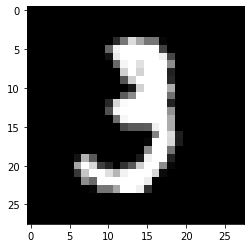

In [7]:
# pick a sample to plot
sample = 10
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

#### 2. Pré-processamento

Podemos utilizar técnicas de PDI para ressaltar algumas características da imagem, sendo técnicas mais comuns:
* CLAHE
* Equalização
* Alterações de brilho e contraste
* Transformação de imagens para tons de cinza (quando a cor não for descriminativa para a resolução do problema)
* LBP

Podemos utilizar técnicas de PDI também para data augmentation! Um processo em que geramos novas imagens do nosso dataset, a partir de imagens originais, com o objetivo de aumentar a generalização do modelo. Técnicas mais comuns utilizadas:
* Rotação
* Transalação
* Blur
* Brilho e contraste

Entretanto, **antes** de qualquer teste com preprocessamentos de PDI, costumamos montar um baseline **apenas** normalizando a imagem.

#### Normalização

In [8]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 3. Particionamento de base de dados

Para uma rede neural, precisamos de três datasets: treino, validação e treino

* O treinamento do modelo ocorre com a base de dados **juntamente** com a base de validação
* A base de validação serve para que o algoritmo verifique se os pesos estimados no treinamento são válidos em outra base de dados. Caso não seja, os pesos são reajustados
* A base de teste é o cenário real de uso, sendo o desempenho nesta base o desempenho final a ser considerado

In [13]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000, 10),
 (12000, 10),
 (10000, 10))

----

In [44]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias para o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [19]:
rede_simples = Sequential() ### define que o modelo é sequencial, isto é, cada camada recebe o resultado da camada imediatamente anterior

rede_simples.add(Flatten()) ### deixa a imagem como vetor ao invés de 2d
rede_simples.add(Dense(25,  input_dim = 784)) ### primeira camada completamente conectada, precisamos passar para esta camada o total de features do modelo (total de pixels da imagem)
rede_simples.add(Activation('relu')) ### define a função de ativação
rede_simples.add(Dense(25)) ### as demais dense não precisam do input_dim
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10)) ### na última camada, definimos o total de neurônios como o total de classes do problema
rede_simples.add(Activation('softmax')) ### para problemas não binários, utilizamos a softmax

### 5. Definir otimizadores

![Title](imgs/otimizadores.gif) 

In [21]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
                     metrics=['accuracy']) ### definimos os parâmetros de otimização do modelo. Neste caso, a função de perdas e o otimizador e as métricas de visualização de desempenho

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [22]:
#### 6. Treinamento

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val))

2022-09-21 13:40:49.652253: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/150
1500/1500 [==============================] - 1s 601us/step - loss: 0.4062 - accuracy: 0.8765 - val_loss: 0.2203 - val_accuracy: 0.9349
Epoch 2/150
1500/1500 [==============================] - 1s 537us/step - loss: 0.1929 - accuracy: 0.9431 - val_loss: 0.1995 - val_accuracy: 0.9401
Epoch 3/150
1500/1500 [==============================] - 1s 556us/step - loss: 0.1551 - accuracy: 0.9534 - val_loss: 0.1642 - val_accuracy: 0.9488
Epoch 4/150
1500/1500 [==============================] - 1s 558us/step - loss: 0.1321 - accuracy: 0.9600 - val_loss: 0.1522 - val_accuracy: 0.9538
Epoch 5/150
1500/1500 [==============================] - 1s 535us/step - loss: 0.1186 - accuracy: 0.9634 - val_loss: 0.1575 - val_accuracy: 0.9512
Epoch 6/150
1500/1500 [==============================] - 1s 545us/step - loss: 0.1052 - accuracy: 0.9674 - val_loss: 0.1437 - val_accuracy: 0.9582
Epoch 7/150
1500/1500 [==============================] - 1s 524us/step - loss: 0.0959 - accuracy: 0.9697 - val_loss: 0

##### 7. Avaliação do modelo

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

0.9598

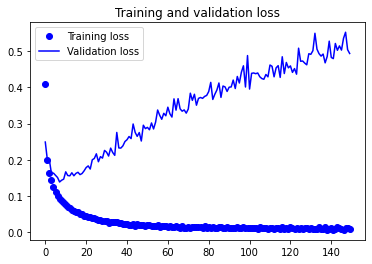

In [53]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento
3. Batch normalization: normalizar a saída das camadas

In [23]:
 es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, 
                    mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 1s 581us/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 0.4823 - val_accuracy: 0.9607
Epoch 2/150
1500/1500 [==============================] - 1s 546us/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.4890 - val_accuracy: 0.9588
Epoch 3/150
1500/1500 [==============================] - 1s 540us/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.5039 - val_accuracy: 0.9595
Epoch 4/150
1500/1500 [==============================] - 1s 535us/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.4974 - val_accuracy: 0.9592
Epoch 5/150
1500/1500 [==============================] - 1s 532us/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.5095 - val_accuracy: 0.9585
Epoch 6/150
1500/1500 [==============================] - 1s 538us/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.4922 - val_accuracy: 0.9607
Epoch 7/150
1500/1500 [==============================] - 1s 551us/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0

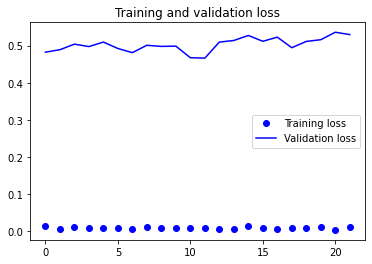

In [24]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_es = rede_simples.predict(x_test) #### gera novas predições de uma base. O resultado disso é uma matriz com a "probabilidade" de cada classe

accuracy_score(y_test.argmax(1), pred_es.argmax(1) ### colocamos o argmax para encontrar a classe com maior probabilidade após o predict

0.961

In [26]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[ 964,    0,    1,    2,    3,    0,    3,    3,    2,    2],
       [   0, 1121,    3,    4,    1,    1,    0,    2,    2,    1],
       [   3,    3,  983,    6,   12,    0,    2,   14,    9,    0],
       [   1,    0,    5,  961,    2,   14,    0,   15,   11,    1],
       [   2,    2,    2,    2,  949,    0,    4,    3,    1,   17],
       [   2,    0,    0,   19,    4,  829,   14,    4,   11,    9],
       [   3,    4,    3,    1,    8,    3,  927,    3,    6,    0],
       [   1,    1,   10,    5,    1,    1,    0,  995,    6,    8],
       [   8,    6,    2,   18,    4,    4,    3,    4,  921,    4],
       [   2,    4,    0,    6,   15,    1,    0,   18,    3,  960]])

### Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

![Title](imgs/dropout_.gif) 

In [27]:
rede_dropout = Sequential()
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,  input_dim = 784))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.5)) ### definimos o dropout com probabilidade p = 0.5. No caso, utilizamos 0.5 neurô
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(10))
rede_dropout.add(Activation('softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [46]:
 historico = rede_dropout.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1250/1250 [==============================] - 2s 949us/step - loss: 1.8478 - accuracy: 0.3376 - val_loss: 1.7643 - val_accuracy: 0.3632
Epoch 2/150
1250/1250 [==============================] - 1s 809us/step - loss: 1.6727 - accuracy: 0.4004 - val_loss: 1.6374 - val_accuracy: 0.4145
Epoch 3/150
1250/1250 [==============================] - 1s 834us/step - loss: 1.6110 - accuracy: 0.4243 - val_loss: 1.6813 - val_accuracy: 0.3949
Epoch 4/150
1250/1250 [==============================] - 1s 828us/step - loss: 1.5713 - accuracy: 0.4376 - val_loss: 1.6228 - val_accuracy: 0.4117
Epoch 5/150
1250/1250 [==============================] - 1s 800us/step - loss: 1.5448 - accuracy: 0.4488 - val_loss: 1.6733 - val_accuracy: 0.4012
Epoch 6/150
1250/1250 [==============================] - 1s 834us/step - loss: 1.5156 - accuracy: 0.4561 - val_loss: 1.6432 - val_accuracy: 0.4040
Epoch 7/150
1250/1250 [==============================] - 1s 785us/step - loss: 1.4956 - accuracy: 0.4658 - val_loss: 1

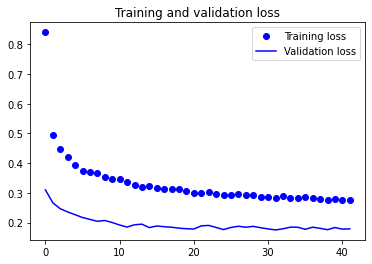

In [29]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
pred_dropout = rede_dropout.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

0.9535

In [31]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[ 969,    0,    3,    1,    2,    0,    3,    1,    1,    0],
       [   0, 1120,    5,    2,    0,    2,    2,    2,    2,    0],
       [   3,    1,  998,   10,    1,    1,    4,    9,    5,    0],
       [   0,    1,   19,  952,    0,   24,    0,    8,    4,    2],
       [   1,    4,    5,    0,  942,    0,    8,    2,    1,   19],
       [   3,    3,    2,   16,    5,  835,   14,    3,    5,    6],
       [   8,    4,    2,    0,    7,   12,  924,    0,    1,    0],
       [   2,   10,   16,    3,    5,    0,    0,  979,    0,   13],
       [  13,    9,   11,   13,    7,   15,    7,    5,  885,    9],
       [   6,    3,    1,    9,   34,   11,    1,    9,    4,  931]])

### Batch Normalization

Lembremos da estrutura básica de um neurônio, o resultado do neurônio é a **soma ponderada** das entradas e seus pesos certo?

* Uma vez que os pesos são definidos aleatoriamente, temos uma infinidade de valores possíveis. 

* O resultado disso é que cada camada possua sua própria distribuição, o que pode não ser muito benéfico para o modelo

* Pensemos em uma base de dados estruturada, se tivermos uma coluna com valores entre 0 e 1, e outra coluna entre 10 e 100000. O comum é normalizarmos este dataset para que todas as features fiquem em um intervalo de 0 a 1 certo?

* A normalização do batch consiste em adotar o mesmo princípio para a saída de camadas! A cada camada, **antes da função de ativação**, normalizamos os pesos para serem utilizados como entrada da próxima camada

* Não é necessário normalizar a camada de saída da rede, uma vez que a saída dela é a própria classificação

* Com as features e pesos normalizados, o aprendizado do modelo acaba ficando mais rápido, uma vez que o gradiente passa a ter menos problemas de convergência (embora ainda existam). 

* O batch normalization evita problemas de degradação do aprendizado, o que leva a aumento do erro do modelo, principalmente a medida que adicionamos mais camadas. Por isso, é mais comumente utilizado em modelos mais **profundos**

![Title](imgs/perceptron.png)



In [47]:
rede_batch_norm = Sequential()
rede_batch_norm.add(Flatten())
rede_batch_norm.add(Dense(25,  input_dim = 784))
rede_batch_norm.add(BatchNormalization()) ### batch norm sempre antes da função de ativação
rede_batch_norm.add(Activation('relu'))
rede_batch_norm.add(Dense(25))
rede_batch_norm.add(BatchNormalization()) ### batch norm sempre antes da função de ativação
rede_batch_norm.add(Activation('relu'))
rede_batch_norm.add(Dense(25))
rede_batch_norm.add(BatchNormalization()) ### batch norm sempre antes da função de ativação
rede_batch_norm.add(Activation('relu'))
rede_batch_norm.add(Dense(10))
rede_batch_norm.add(Activation('softmax'))

rede_batch_norm.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])



In [48]:
 historico = rede_batch_norm.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1250/1250 [==============================] - 2s 1ms/step - loss: 1.8627 - accuracy: 0.3346 - val_loss: 1.8228 - val_accuracy: 0.3346
Epoch 2/150
1250/1250 [==============================] - 1s 856us/step - loss: 1.6671 - accuracy: 0.4070 - val_loss: 1.7198 - val_accuracy: 0.3891
Epoch 3/150
1250/1250 [==============================] - 1s 856us/step - loss: 1.6040 - accuracy: 0.4310 - val_loss: 1.7356 - val_accuracy: 0.3800
Epoch 4/150
1250/1250 [==============================] - 1s 862us/step - loss: 1.5632 - accuracy: 0.4425 - val_loss: 1.6417 - val_accuracy: 0.4075
Epoch 5/150
1250/1250 [==============================] - 1s 813us/step - loss: 1.5364 - accuracy: 0.4535 - val_loss: 1.5500 - val_accuracy: 0.4456
Epoch 6/150
1250/1250 [==============================] - 1s 845us/step - loss: 1.5039 - accuracy: 0.4648 - val_loss: 1.5819 - val_accuracy: 0.4342
Epoch 7/150
1250/1250 [==============================] - 1s 842us/step - loss: 1.4858 - accuracy: 0.4753 - val_loss: 1.6

# Prática 2 - CIFAR 10

Semelhantemente ao MNIST, agora utilizaremos outra base de dados disponível no tensorflow.
Desta vez, utilizaremos o CIFAR10, base de dados que possui 10 classes divididas em animais e meios de transporte.

De forma geral, podemos pensar neste dataset como:
* Complexidade moderada: os objetos estão em diferentes posições e ângulos. Existe também uma variabilidade dos objetos. Se olharmos para a classe "bird" por exemplo, ela vai desde pássaros, galinhas, até avestruz. Também existe um background diferenciado a cada imagem, aumentando também um pouco a complexidade do modelo.
* Processamento rápido: as imagens são pequenas (32x32), apesar de imagens serem coloridas (3 canais de cores)

![Title](imgs/cifar10_dataset.png) 

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


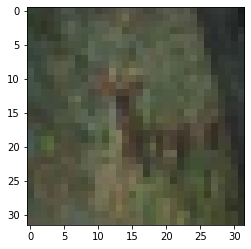

In [34]:
# pick a sample to plot
sample = 10
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image)
plt.show()

In [35]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

In [36]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [37]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

In [38]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(240, input_dim = 1024))
rede_simples.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_simples.add(Dense(512))
rede_simples.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_simples.add(Dense(512))
rede_simples.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

In [39]:
import tensorflow as tf

rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [40]:
 es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
    
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
625/625 [==============================] - 4s 5ms/step - loss: 1.8603 - accuracy: 0.3210 - val_loss: 1.7263 - val_accuracy: 0.3787
Epoch 2/150
625/625 [==============================] - 3s 5ms/step - loss: 1.6707 - accuracy: 0.3980 - val_loss: 1.5882 - val_accuracy: 0.4334
Epoch 3/150
625/625 [==============================] - 3s 5ms/step - loss: 1.5821 - accuracy: 0.4325 - val_loss: 1.5998 - val_accuracy: 0.4248
Epoch 4/150
625/625 [==============================] - 3s 5ms/step - loss: 1.5303 - accuracy: 0.4501 - val_loss: 1.5145 - val_accuracy: 0.4510
Epoch 5/150
625/625 [==============================] - 3s 5ms/step - loss: 1.4872 - accuracy: 0.4683 - val_loss: 1.4832 - val_accuracy: 0.4640
Epoch 6/150
625/625 [==============================] - 3s 5ms/step - loss: 1.4448 - accuracy: 0.4793 - val_loss: 1.4763 - val_accuracy: 0.4703
Epoch 7/150
625/625 [==============================] - 3s 5ms/step - loss: 1.4094 - accuracy: 0.4928 - val_loss: 1.5310 - val_accuracy: 0.4524

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

0.4885

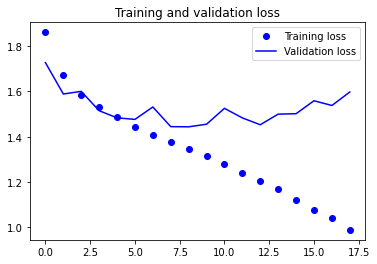

In [42]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Prática 3 - Boston House Pricing

Por fim, vamos utilizar uma rede neural para regressão e dados estruturados.

* Para dados estruturados, o pensamento é bem semelhante em termos de arquitetura. A única diferença é que agora nosso total de features (input_shape) será **igual a quantidade de colunas do dataset**
* Para regressão, a diferença está na **função de perdas!** Neste caso utilizamos as [mesmas funções de predição](https://keras.io/api/losses/regression_losses/) vistas nos módulos anteriores (mse e rmse por exemplo)

OBS. para este problema iremos apenas normalizar nossas features. Entretanto, o preprocessamento de dados estruturados para rede neural é **exatamente o mesmo** utilizado para os demais algoritmos de machine learning neste contexto. 

![Title](imgs/boston_prices.png) 

In [49]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()


In [50]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [51]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [53]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_treino.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [54]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

historico = model.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
6/6 [==============================] - 0s 11ms/step - loss: 551.0490 - mae: 21.7455 - val_loss: 479.8676 - val_mae: 19.6801
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 501.7131 - mae: 20.5978 - val_loss: 436.6777 - val_mae: 18.6220
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: 453.4032 - mae: 19.4895 - val_loss: 390.6758 - val_mae: 17.4044
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 401.9372 - mae: 18.2448 - val_loss: 345.5834 - val_mae: 16.1933
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 350.8582 - mae: 16.9238 - val_loss: 300.2538 - val_mae: 14.8877
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 300.0972 - mae: 15.4797 - val_loss: 251.3937 - val_mae: 13.4832
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 247.2059 - mae: 13.9096 - val_loss: 211.6337 - val_mae: 12.1359
Epoch 8/150
6/6 [==============================] - 0s 

In [55]:
pred_simples = model.predict(x_test)

In [56]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, pred_simples)

3.33838030871223